In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import netCDF4 as nc

In [299]:

# precip index
file_path = r"/data92/PeterChang/Paper2/IMERG_from_kai/outfile"
with h5py.File(file_path, "r") as f:
    precip_all = f["precipitation"][:]  # (7670, 360, 576)

# precip index
file_path = r"/data92/PeterChang/Paper2/IMERG_from_kai/climatology.nc"
with h5py.File(file_path, "r") as f:
    precip_clim = f["precipitation"][:]  # (365, 360, 576)

# precip index
file_path = r"/data92/PeterChang/Paper2/IMERG_from_kai/climatology_3harmonics.nc"
with h5py.File(file_path, "r") as f:
    precip_3har = f["precipitation"][:]  # (365, 360, 576)


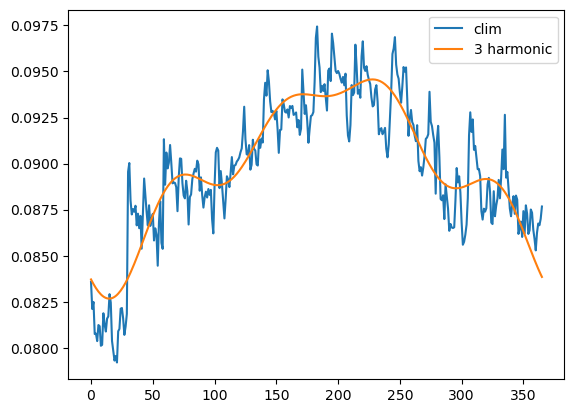

In [307]:
plt.figure()
# plt.plot(precip_all.mean(axis=(1,2)), label="Origin")
plt.plot(precip_clim.mean(axis=(1,2)), label="clim")
plt.plot(precip_3har.mean(axis=(1,2)), label="3 harmonic")
plt.legend()

In [2]:
# precip index
file_path = r"/data92/PeterChang/Paper2/IMERG_from_kai/precipitation_2001_2021_anomaly.nc"
with h5py.File(file_path, "r") as f:
    precip = f["precipitation"][:]  # (7670, 360, 576)


In [3]:
precip.shape

(7670, 360, 576)

In [533]:
# 獲取緯度範圍 (範圍 -20° ~ 20°)
lat_coarse = np.linspace(-90,90,360)
lat_tropic = (lat_coarse >= -20) & (lat_coarse <= 20)  

# 選取該範圍內的降水數據
precip_tropic = precip[:, lat_tropic, :]  

# 計算經度平均 (Zonal Mean, 沿著 axis=1 方向計算)
precip_tropic_zonal_mean = np.nanmean(precip_tropic, axis=(1,2))  


In [534]:
print(precip_tropic.shape)
print(precip_tropic_zonal_mean.shape)


(7670, 80, 576)
(7670,)


In [535]:
# 計算極端降水事件 (均值 + 2σ)
mean_precip = np.nanmean(precip_tropic_zonal_mean)
std_precip  = np.nanstd(precip_tropic_zonal_mean)   
extreme_threshold          = mean_precip + 1 * std_precip    # 
extreme_threshold_2std     = mean_precip + 2 * std_precip    # 

extreme_threshold_dry = mean_precip - 1 * std_precip    # 


# 選出超過閾值的降水事件
extreme_precip = precip_tropic_zonal_mean[precip_tropic_zonal_mean > extreme_threshold]
extreme_dry    = precip_tropic_zonal_mean[precip_tropic_zonal_mean < extreme_threshold_dry]


print("📌 極端降水事件數:", extreme_precip.shape[0])
print("✅ 極端降水計算完成！")

print("📌 極端乾旱事件數:", extreme_dry.shape[0])
print("✅ 極端降水計算完成！")

📌 極端降水事件數: 1206
✅ 極端降水計算完成！
📌 極端乾旱事件數: 1208
✅ 極端降水計算完成！


In [536]:
precip_tropic_zonal_mean.shape

(7670,)

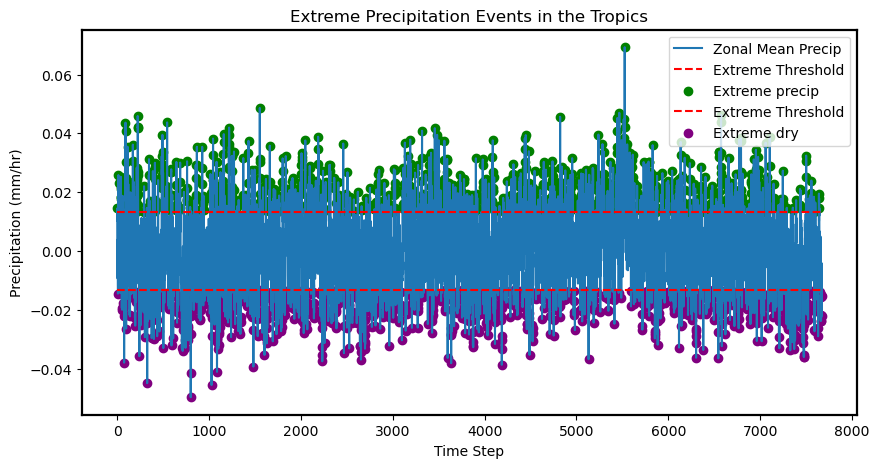

In [537]:
# 先找出 `extreme_precip` 的索引
extreme_indices       = np.where(precip_tropic_zonal_mean > extreme_threshold)[0]
extreme_indices_2std  = np.where(precip_tropic_zonal_mean > extreme_threshold_2std)[0]

extreme_indices_dry = np.where(precip_tropic_zonal_mean < extreme_threshold_dry)[0]


plt.figure(figsize=(10, 5))
plt.plot(precip_tropic_zonal_mean, label="Zonal Mean Precip")  # 主要降水數據
plt.hlines(y=extreme_threshold, xmin=0, xmax=len(precip_tropic_zonal_mean)-1, color="red", linestyle="dashed", label="Extreme Threshold")  # 閾值線
plt.scatter(extreme_indices, extreme_precip, color="Green", label="Extreme precip")  # 正確的索引 & 數據點

plt.hlines(y=extreme_threshold_dry, xmin=0, xmax=len(precip_tropic_zonal_mean)-1, color="red", linestyle="dashed", label="Extreme Threshold")  # 閾值線
plt.scatter(extreme_indices_dry, extreme_dry, color="Purple", label="Extreme dry")  # 正確的索引 & 數據點

plt.xlabel("Time Step")
plt.ylabel("Precipitation (mm/hr)")
plt.legend()
plt.title("Extreme Precipitation Events in the Tropics")
plt.show()


In [538]:
print("Extreme precip mean:", np.nanmean(extreme_precip))
print("Extreme dry mean:", np.nanmean(extreme_dry))


Extreme precip mean: 0.020737098165978067
Extreme dry mean: -0.01951012680654398


In [462]:
# read u file 
file_path = f"/data92/PeterChang/Paper2/Reanalysis/u_kai/ubaro_2001_2022_anomaly.nc"
with nc.Dataset(file_path, "r") as f:
    u_anomaly = f["ubaro"][:]  # (7670, 360, 576)


In [444]:
u_anomaly.shape

(7670, 360, 576)

In [383]:
# read u file 
file_path = f"/data92/PeterChang/Paper2/Reanalysis/u_kai/climatology_3harmonics.nc"
with nc.Dataset(file_path, "r") as f:
    u_3har = f["ubaro"][:]  # (365, 360, 576)

file_path = f"/data92/PeterChang/Paper2/Reanalysis/u_kai/climatology.nc"
with nc.Dataset(file_path, "r") as f:
    u_clim = f["ubaro"][:]  # (365, 360, 576)

file_path = f"/data92/PeterChang/Paper2/Reanalysis/u_kai/outfile"
with nc.Dataset(file_path, "r") as f:
    u_origin = f["ubaro"][:]  # (7670, 360, 576)

In [384]:
u_clim.shape

(366, 360, 576)

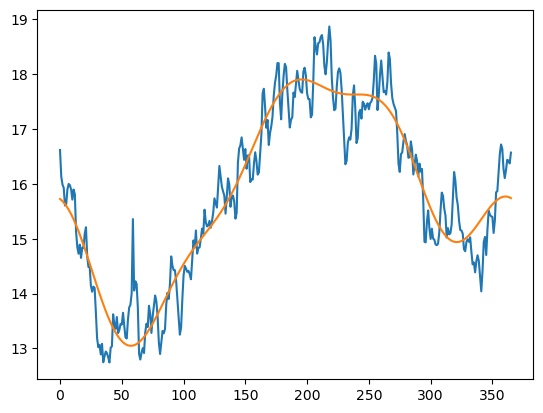

In [379]:
plt.figure()
plt.plot(u_clim[:,100,:].mean(axis=(1)))
plt.plot(u_3har[:,100,:].mean(axis=(1)))
# plt.plot(u_origin[:,:,:].mean(axis=(0,2)))


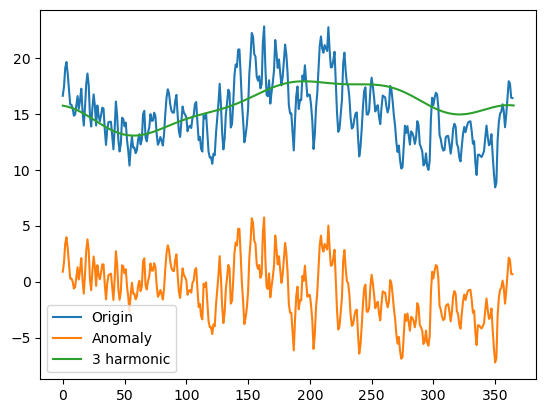

In [380]:
plt.figure()
plt.plot(u_origin[:365,100,:].mean(axis=1), label="Origin")
plt.plot(u_anomaly[:365,100,:].mean(axis=1), label="Anomaly")
plt.plot(u_3har[:,100,:].mean(axis=(1)), label="3 harmonic")
plt.legend()


In [539]:
lag = 2
extreme_indices_lag10 = extreme_indices+lag
extreme_indices_lag10 = extreme_indices_lag10[extreme_indices_lag10<7670]

extreme_indices_dry_lag10 = extreme_indices_dry+lag
extreme_indices_dry_lag10 = extreme_indices_dry_lag10[extreme_indices_dry_lag10<7670]


final_u     = u_anomaly[extreme_indices_lag10].mean(axis=(0,2)) #- u_origin.mean(axis=(0,2))
final_u_dry = u_anomaly[extreme_indices_dry_lag10].mean(axis=(0,2))#- u_origin.mean(axis=(0,2))
# u_clim = np.nanmean(u_anomaly, axis=0)  # 計算整個時間序列的平均
# final_u = np.nanmedian(u_anomaly[extreme_indices_lag10], axis=(0,2))
# final_u_dry = np.nanmedian(u_anomaly[extreme_indices_dry_lag10], axis=(0,2))


In [540]:
u_clim.shape

(366, 360, 576)

In [541]:
u_anomaly.shape

(7670, 360, 576)

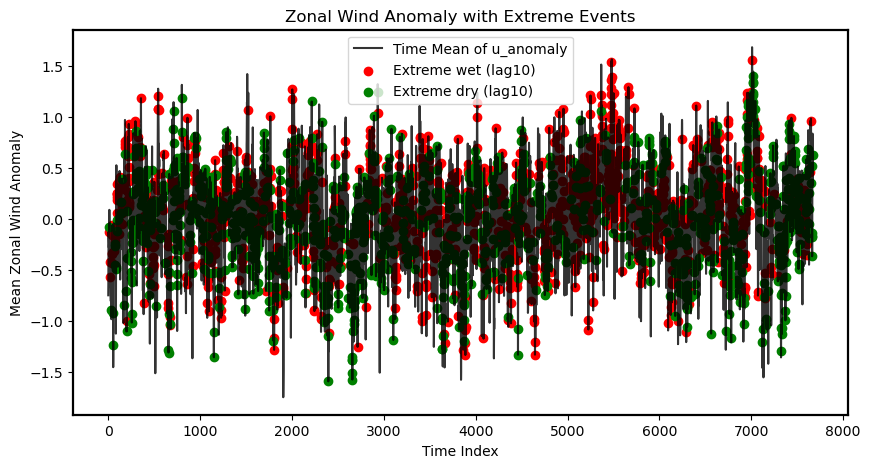

In [542]:

plt.figure(figsize=(10, 5))

# 畫出 u_anomaly 的時間均值
plt.plot(u_anomaly.mean(axis=(1,2))[:], label="Time Mean of u_anomaly", color="Black", alpha=0.8)

# 標出 extreme_indices_lag10 上的值
plt.scatter(extreme_indices_lag10, u_anomaly[extreme_indices_lag10].mean(axis=(1,2)), 
            color="red", label="Extreme wet (lag10)")

plt.scatter(extreme_indices_dry_lag10, u_anomaly[extreme_indices_dry_lag10].mean(axis=(1,2)), 
            color="Green", label="Extreme dry (lag10)")


plt.xlabel("Time Index")
plt.ylabel("Mean Zonal Wind Anomaly")
plt.legend()
plt.title("Zonal Wind Anomaly with Extreme Events")
plt.show()


In [543]:
final_u.shape

(360,)

In [544]:
final_u2.shape

(343039,)

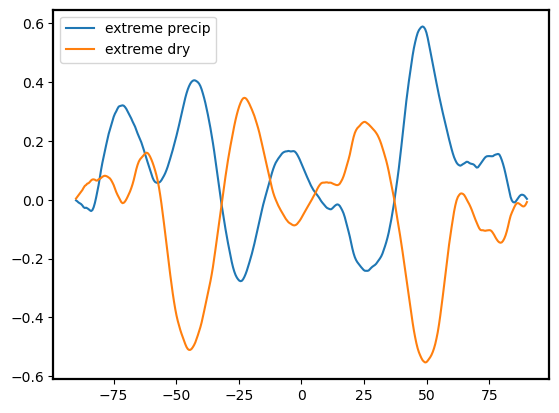

In [545]:
plt.figure()
plt.plot(lat_coarse, final_u, label="extreme precip")
plt.plot(lat_coarse, final_u_dry, label="extreme dry")
# plt.plot(lat_coarse, final_u - final_u_dry, label="wet - dry")


plt.legend()

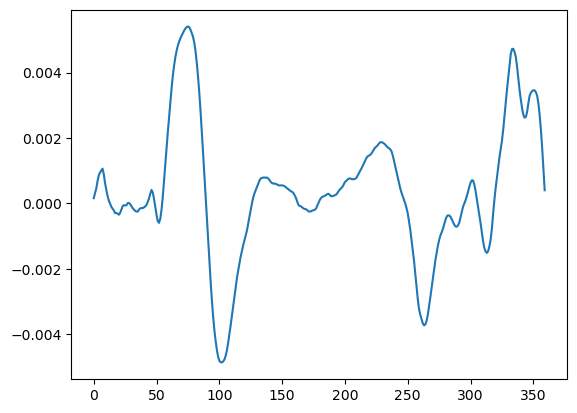

In [452]:
plt.figure()
# plt.plot(u_origin.mean(axis=(0,2)) - u_clim.mean(axis=(0,2)))
# plt.plot(u_origin[:365].mean(axis=(0,2)))
# plt.plot(u_clim[:365].mean(axis=(0,2)))

# plt.plot(u_origin[:].mean(axis=(0,2)))
# plt.plot(u_clim[:].mean(axis=(0,2)))
plt.plot(u_anomaly[:].mean(axis=(0,2)))






In [453]:
np.isnan(u_anomaly).sum()

0

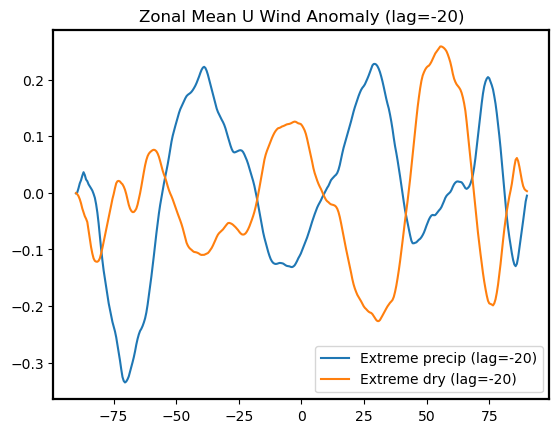

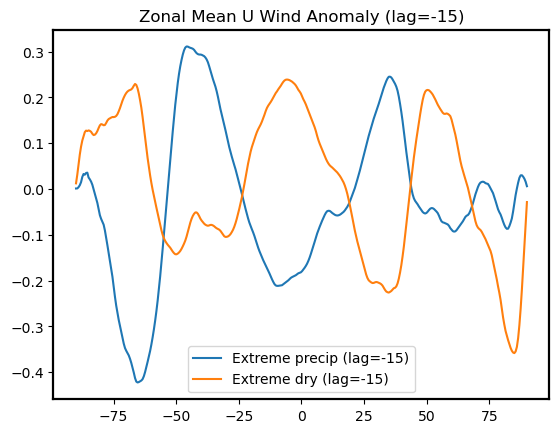

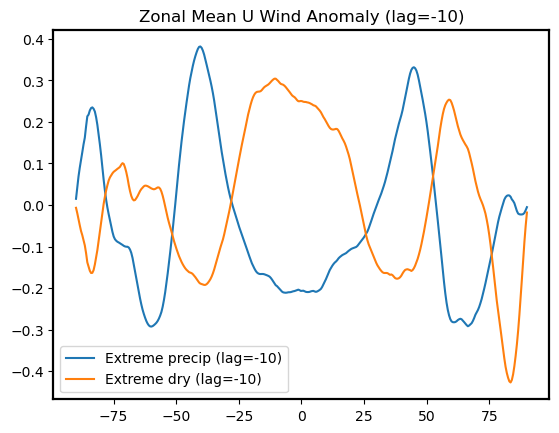

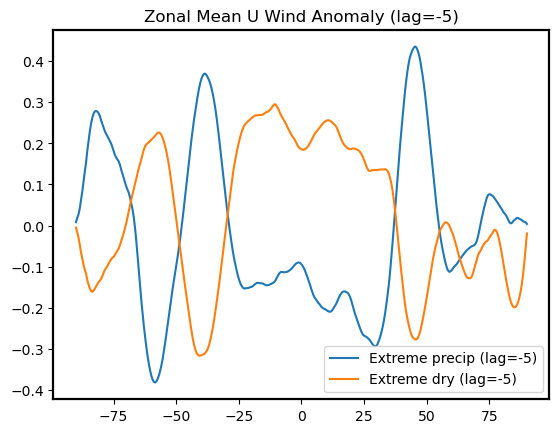

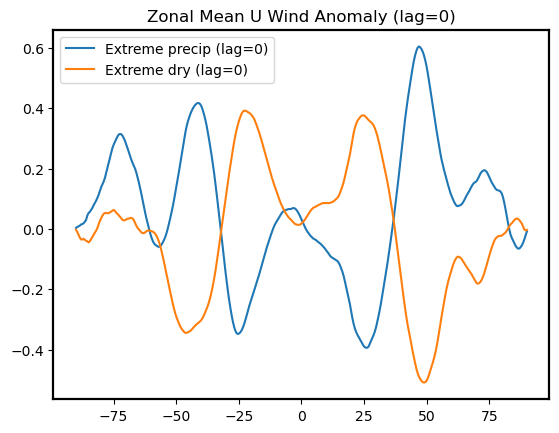

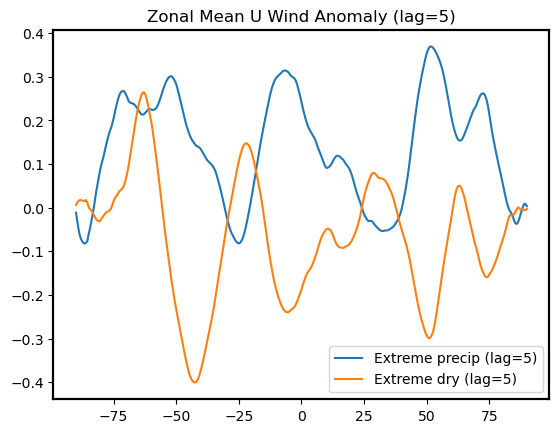

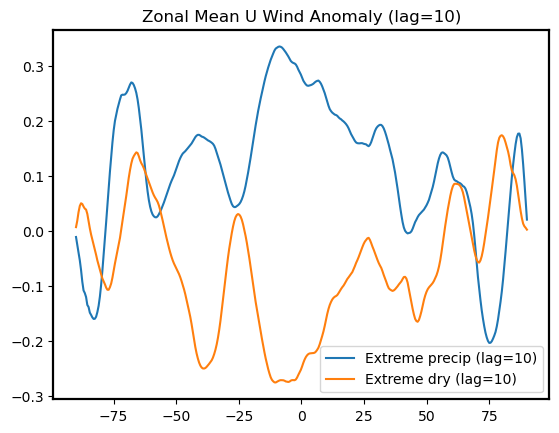

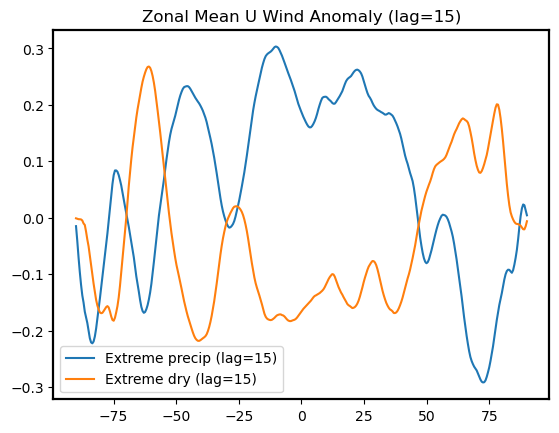

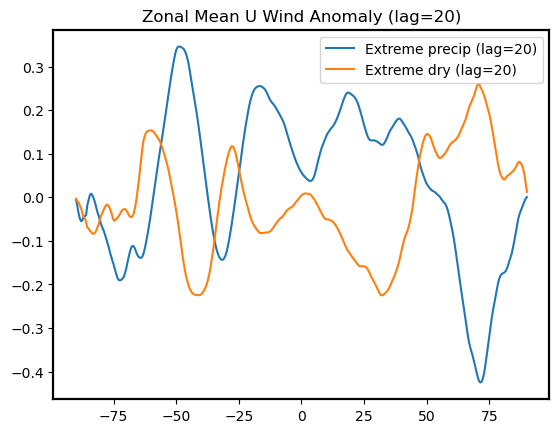

In [546]:
for test_lag in [-20, -15, -10, -5, 0, 5, 10, 15, 20]:
    extreme_indices_test = extreme_indices + test_lag
    extreme_indices_test = extreme_indices_test[extreme_indices_test < 7670]

    extreme_indices_dry_test = extreme_indices_dry + test_lag
    extreme_indices_dry_test = extreme_indices_dry_test[extreme_indices_dry_test < 7670]

    final_u     = u_anomaly[extreme_indices_test].mean(axis=(0,2))
    final_u_dry = u_anomaly[extreme_indices_dry_test].mean(axis=(0,2))

    plt.figure()
    plt.plot(lat_coarse, final_u, label=f"Extreme precip (lag={test_lag})")
    plt.plot(lat_coarse, final_u_dry, label=f"Extreme dry (lag={test_lag})")
    plt.legend()
    plt.title(f"Zonal Mean U Wind Anomaly (lag={test_lag})")
    plt.show()


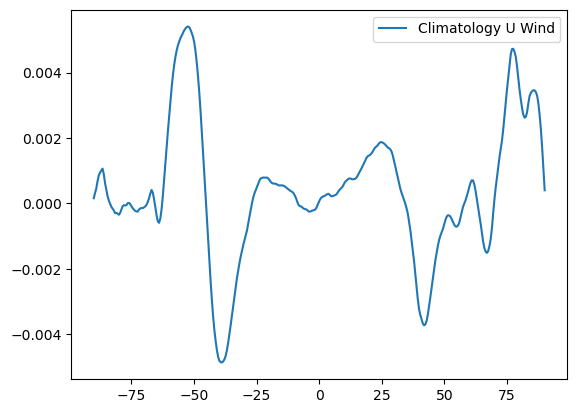

In [455]:
u_clim_zonal_mean = np.nanmean(u_anomaly, axis=(0,2))  # 整體的 climatology
plt.plot(lat_coarse, u_clim_zonal_mean, label="Climatology U Wind")
plt.legend()
plt.show()


In [456]:
print("U anomaly min:", np.nanmin(u_anomaly))
print("U anomaly max:", np.nanmax(u_anomaly))
print("U anomaly mean:", np.nanmean(u_anomaly))


U anomaly min: -50.270615
U anomaly max: 45.35325
U anomaly mean: 0.0004096466


In [530]:
# 定義 lag 範圍 (5~25)
start_day = 5
end_day   = 15

lag_range = np.arange(start_day, end_day)

# 初始化儲存結果的數組
final_u_mean = np.zeros((360,))
final_u_dry_mean = np.zeros((360,))

# 累積所有 lag 的結果
final_u_accum = []
final_u_dry_accum = []

for lag in lag_range:
    extreme_indices_lag = extreme_indices + lag
    extreme_indices_lag = extreme_indices_lag[extreme_indices_lag < 7670]

    extreme_indices_dry_lag = extreme_indices_dry + lag
    extreme_indices_dry_lag = extreme_indices_dry_lag[extreme_indices_dry_lag < 7670]

    final_u_lag = u_anomaly[extreme_indices_lag].mean(axis=(0, 2))
    final_u_dry_lag = u_anomaly[extreme_indices_dry_lag].mean(axis=(0, 2))

    final_u_accum.append(final_u_lag)
    final_u_dry_accum.append(final_u_dry_lag)

# 取 lag 5~25 之間的 mean
final_u_mean = np.mean(final_u_accum, axis=0)
final_u_dry_mean = np.mean(final_u_dry_accum, axis=0)




In [531]:
colors = np.array([[112, 115, 115], [182, 203, 227], [89, 159, 218], 
                   [0, 83, 170], [0, 4, 167], [0, 140, 1]]) / 255.0

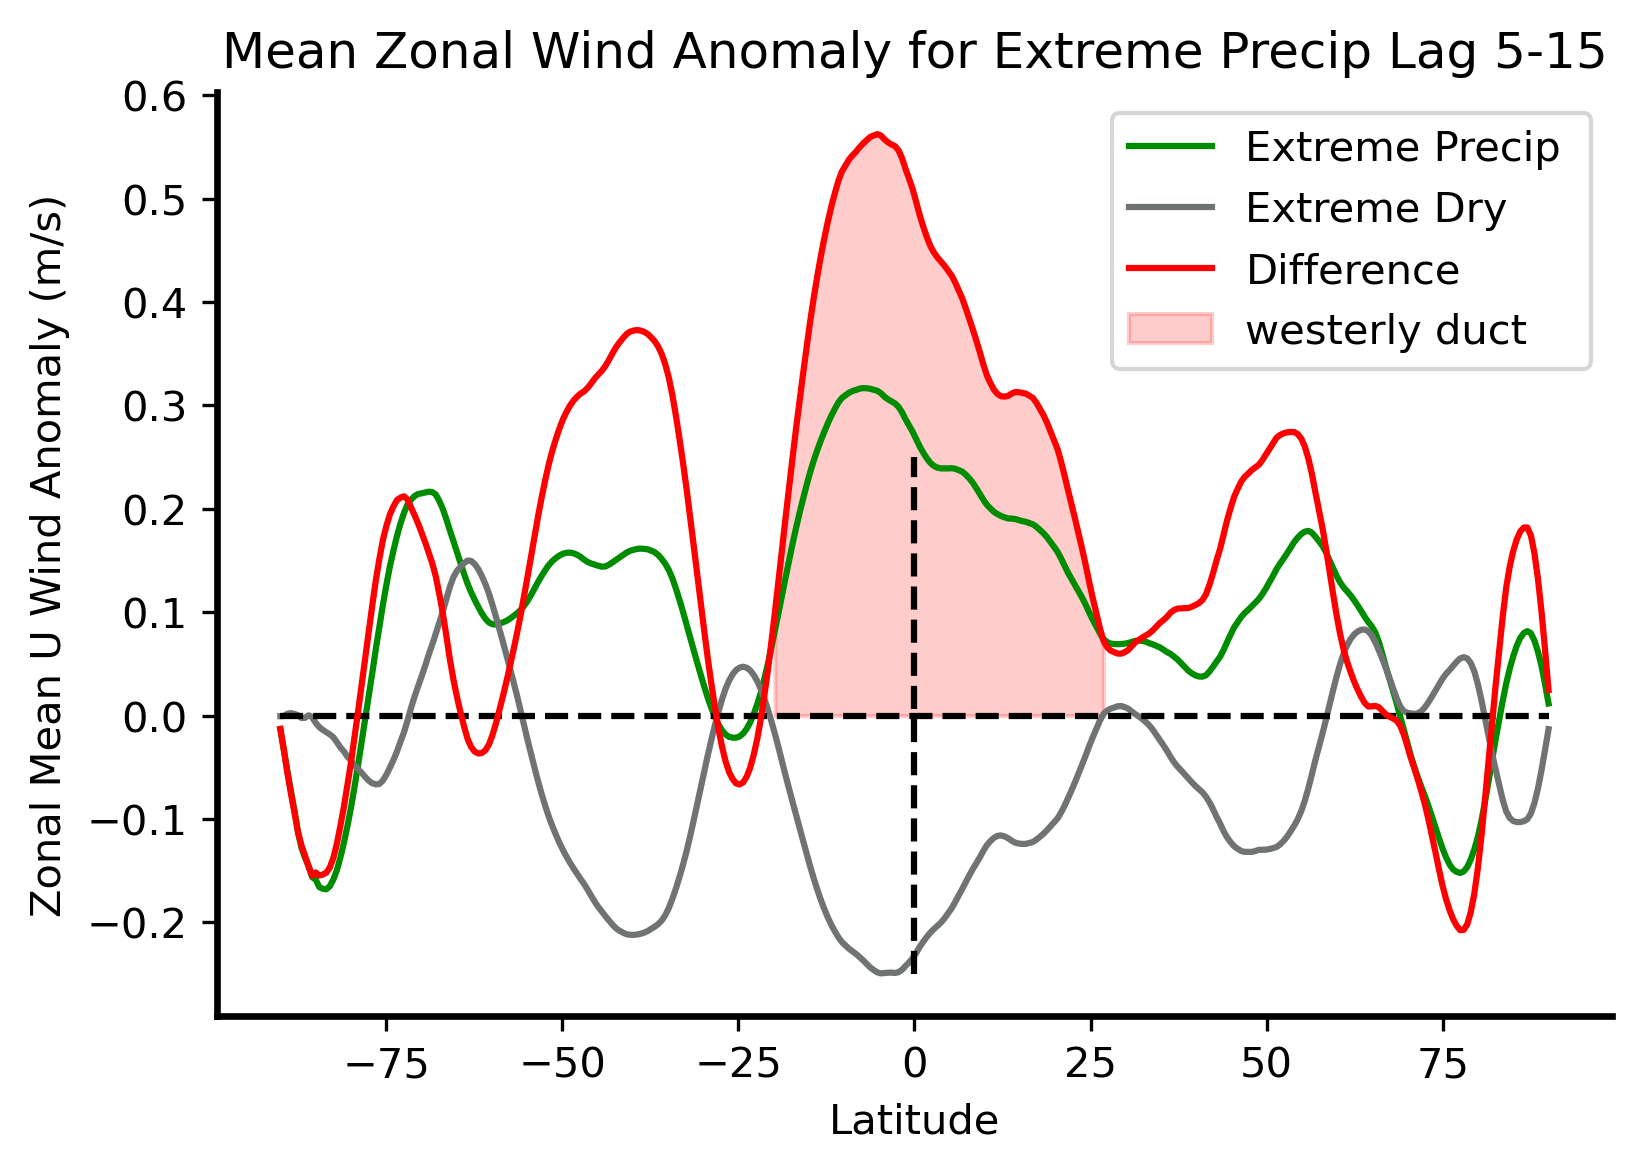

In [532]:
# 視覺化結果
import matplotlib as mpl

fig, ax = plt.subplots(1, figsize=(6,4), dpi=300.)
mpl.rcParams['axes.linewidth'] = 1.6
# plt.figure(figsize=(8,5))
ax.plot(lat_coarse, final_u_mean, label=f"Extreme Precip ", color=colors[-1])
ax.plot(lat_coarse, final_u_dry_mean, label=f"Extreme Dry ", color=colors[0])
ax.set_xlabel("Latitude")
ax.set_ylabel("Zonal Mean U Wind Anomaly (m/s)")
ax.set_title(f"Mean Zonal Wind Anomaly for Extreme Precip Lag {start_day}-{end_day}")
ax.hlines(y=0, xmin=-90, xmax=90, color="Black", linestyles="dashed")
ax.vlines(x=0, ymin=-0.25, ymax=0.25, color="Black", linestyles="dashed")

u_diff = final_u_mean - final_u_dry_mean
ax.plot(lat_coarse, u_diff, label=f"Difference", color="Red")

ax.fill_between(
    lat_coarse, u_diff, 0, 
    where=(lat_coarse >= -20) & (lat_coarse <= 27), 
    color='red', alpha=0.2, label="westerly duct"
)
plt.legend()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.show()

In [514]:
u_diff.max()

0.5624049

In [518]:
final_u_mean.shape

(360,)